## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

### L1

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 61us/step - loss: 6.0087 - acc: 0.2749 - val_loss: 5.8139 - val_acc: 0.3407
Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 5.7239 - acc: 0.3600 - val_loss: 5.6387 - val_acc: 0.3810
Epoch 3/50
50000/50000 [==============================] - 3s 53us/step - loss: 5.5750 - acc: 0.3929 - val_loss: 5.5166 - val_acc: 0.4031
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.4551 - acc: 0.4114 - val_loss: 5.3963 - val_acc: 0.4219
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 5.3468 - acc: 0.4294 - val_loss: 5.3001 - val_acc: 0.4272
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 5.2463 - acc: 0.4427 - val_loss: 5.2166 - val_acc: 0.4334
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.1525 - acc: 0.4529 - val_loss: 5.1138 - val_acc

50000/50000 [==============================] - 3s 61us/step - loss: 1.7170 - acc: 0.3988 - val_loss: 1.6853 - val_acc: 0.4104
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6571 - acc: 0.4214 - val_loss: 1.6394 - val_acc: 0.4217
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6085 - acc: 0.4363 - val_loss: 1.5997 - val_acc: 0.4357
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5707 - acc: 0.4497 - val_loss: 1.5738 - val_acc: 0.4447
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5392 - acc: 0.4601 - val_loss: 1.5362 - val_acc: 0.4616
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5084 - acc: 0.4717 - val_loss: 1.5287 - val_acc: 0.4637
Epoch 9/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4808 - acc: 0.4799 - val_loss: 1.4957 - val_acc: 0.4719
Epoch 10/50
50000/50000 [===========================

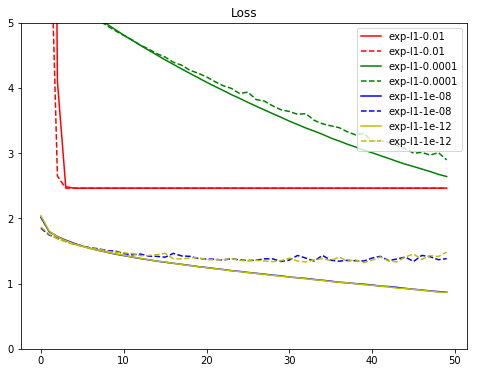

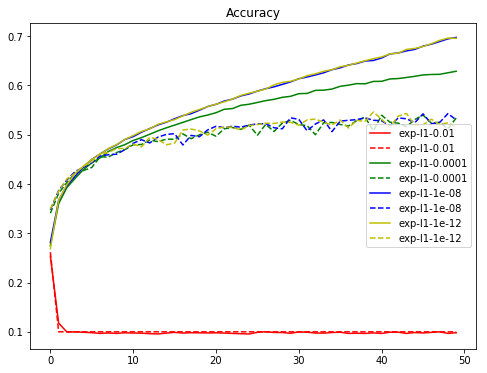

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### L2

In [9]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1355 - acc: 0.2874 - val_loss: 1.9818 - val_acc: 0.3502
Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.9293 - acc: 0.3733 - val_loss: 1.8873 - val_acc: 0.3862
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8444 - acc: 0.4056 - val_loss: 1.8133 - val_acc: 0.4158
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7839 - acc: 0.4233 - val_loss: 1.7644 - val_acc: 0.4280
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7356 - acc: 0.4413 - val_loss: 1.7266 - val_acc: 0.4469
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6995 - acc: 0.4528 - val_loss: 1.7034 - val_acc: 0.4524
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6663 - acc: 0.4647 - val_loss: 1.6750 - val_acc

50000/50000 [==============================] - 3s 53us/step - loss: 1.7222 - acc: 0.3959 - val_loss: 1.6821 - val_acc: 0.4136
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.6607 - acc: 0.4158 - val_loss: 1.6464 - val_acc: 0.4243
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6149 - acc: 0.4339 - val_loss: 1.6087 - val_acc: 0.4324
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5765 - acc: 0.4465 - val_loss: 1.5660 - val_acc: 0.4500
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5412 - acc: 0.4587 - val_loss: 1.5437 - val_acc: 0.4536
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5123 - acc: 0.4698 - val_loss: 1.5298 - val_acc: 0.4524
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4859 - acc: 0.4794 - val_loss: 1.4944 - val_acc: 0.4672
Epoch 10/50
50000/50000 [===========================

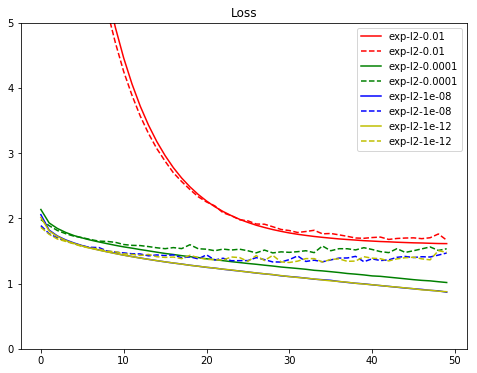

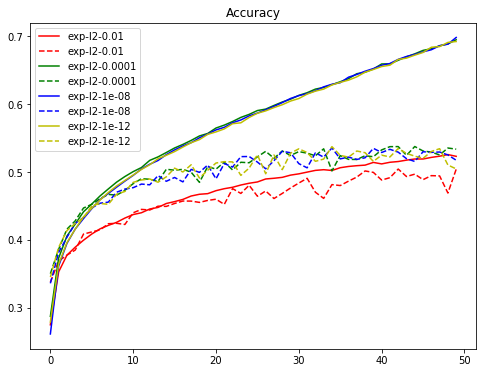

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### L1_L2

In [18]:
def build_l1_l2_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4]
L2_EXP = [1e-2, 1e-4]

In [21]:
for regulizer_ratio_l1 in L1_EXP:    
    for regulizer_ratio_l2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
        model = build_l1_l2_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio_l1, l2_ratio=regulizer_ratio_l2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-l1_l2-l1:%s-l2:%s" % (str(regulizer_ratio_l1), str(regulizer_ratio_l2))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 75us/step - loss: 198.5388 - acc: 0.2317 - val_loss: 41.0109 - val_acc: 0.2713
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 19.0585 - acc: 0.1162 - val_loss: 7.2564 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 4.0991 - acc: 0.0970 - val_loss: 2.6419 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.4850 - acc: 0.0981 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.4626 - acc: 0.0973 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4625 - val

50000/50000 [==============================] - 3s 62us/step - loss: 16.1377 - acc: 0.3578 - val_loss: 14.9735 - val_acc: 0.3725
Epoch 3/50
50000/50000 [==============================] - 3s 60us/step - loss: 13.9484 - acc: 0.3819 - val_loss: 12.9651 - val_acc: 0.3931
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 12.0973 - acc: 0.3955 - val_loss: 11.2630 - val_acc: 0.4002
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 10.5257 - acc: 0.4074 - val_loss: 9.8144 - val_acc: 0.4122
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 9.1872 - acc: 0.4159 - val_loss: 8.5841 - val_acc: 0.4153
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 8.0489 - acc: 0.4207 - val_loss: 7.5333 - val_acc: 0.4197
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 7.0779 - acc: 0.4260 - val_loss: 6.6432 - val_acc: 0.4295
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 55us/step - loss: 5.7064 - acc: 0.3910 - val_loss: 5.6371 - val_acc: 0.4067
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.5795 - acc: 0.4089 - val_loss: 5.5181 - val_acc: 0.4215
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 5.4649 - acc: 0.4263 - val_loss: 5.4185 - val_acc: 0.4333
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.3571 - acc: 0.4415 - val_loss: 5.3118 - val_acc: 0.4476
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.2568 - acc: 0.4543 - val_loss: 5.2231 - val_acc: 0.4478
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.1616 - acc: 0.4628 - val_loss: 5.1352 - val_acc: 0.4582
Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.0681 - acc: 0.4717 - val_loss: 5.0411 - val_acc: 0.4652
Epoch 10/50
50000/50000 [===========================

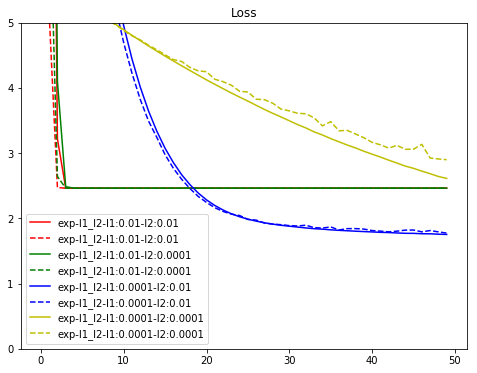

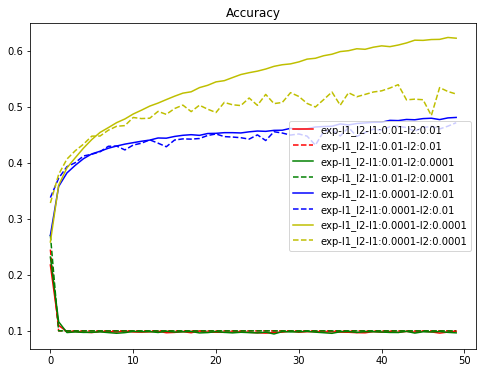

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()